# Problem Statememt



Create a classification model to predict the gender (male or female) based on different acoustic parameters

# Context

This database was created to identify a voice as male or female, based upon 
acoustic properties of the voice and speech. The dataset consists of 3,168 recorded 
voice samples, collected from male and female speakers. The voice samples are preprocessed by acoustic analysis in R using the seewave and tuneR packages, with an 
analyzed frequency range of 0hz-280hz (human vocal range).

# Steps to Consider


1)Remove/handle null values (if any)<br>
2)Depict percentage distribution of label on a pie chart<br>
3)Considering all the features as independent feature and label as dependent feature,
split the dataset training and testing data with test size=20%<br>
4)Apply the following classifier models on training dataset and generate predictions for
the test dataset<br>
a. Decision Tree Classifier<br>
b. Random Forest Classifier<br>
c. KNN Classifier<br>
d. Logistic Regression<br>
e. SVM Classifier<br>
5)Also generate confusion_matrix and classification report for each model generated in
Q4.<br>
6)Report the model with the best accuracy.<br>

### Making Imports

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading Dataset file as dataframe df

In [156]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

# Step 1)Remove/handle null values (if any)

In [158]:
df.isnull().sum()


meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [159]:
df.shape

(3168, 21)

### Label Encoding: 
### male: 1
### female: 0

In [160]:
df['label']=df['label'].astype('category')
df.dtypes
df['label']=df['label'].cat.codes
df['label']


0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int8

### Saperating Input Feature Vector as x and output label feature vector as y

In [161]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)

(3168, 20)
(3168,)


# Step 2)Depict percentage distribution of label on a pie chart

In [162]:
d1 = df['label'].value_counts()
d1

1    1584
0    1584
Name: label, dtype: int64

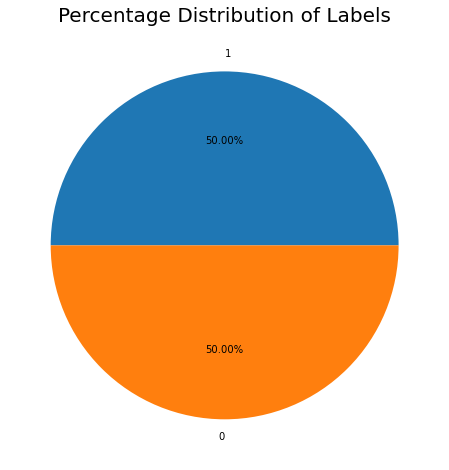

In [163]:
plt.figure(figsize=(10,8))
plt.pie(x=d1, labels=d1.index,autopct='%.2f%%')
plt.title("Percentage Distribution of Labels",fontsize=20)
plt.show()

# Step 3)Considering all the features as independent feature and label as dependent feature, split the dataset training and testing data with test size=20%

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


# Step 4)Apply the following classifier models on training dataset and generate predictions for the test dataset
<br>a. Decision Tree Classifier
<br>b. Random Forest Classifier
<br>c. KNN Classifier
<br>d. Logistic Regression
<br>e. SVM Classifier<br>


## Decision Tree Classifier

In [166]:
from sklearn.tree import DecisionTreeClassifier

In [167]:
#model
decision_tree_model = DecisionTreeClassifier(criterion='gini',max_depth=5)
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [168]:
# Accuracy
print('Training Score',decision_tree_model.score(x_train,y_train))
print('Testing Score',decision_tree_model.score(x_test,y_test))

Training Score 0.9865824782951855
Testing Score 0.973186119873817


## Random Forest Classifier

In [169]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
#model
random_forest_model = RandomForestClassifier(n_estimators=70,criterion='gini',max_depth=5)
random_forest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=70)

In [171]:
# Accuracy
print('Training Score',random_forest_model.score(x_train,y_train))
print('Testing Score',random_forest_model.score(x_test,y_test))

Training Score 0.9826361483820047
Testing Score 0.9716088328075709


## KNN Classifier 

In [172]:
from sklearn.neighbors import KNeighborsClassifier

In [173]:
#model
knn_classifier_model =  KNeighborsClassifier(n_neighbors=5)
knn_classifier_model.fit(x_train,y_train)

KNeighborsClassifier()

In [174]:
# Accuracy
print('Training Score',knn_classifier_model.score(x_train,y_train))
print('Testing Score',knn_classifier_model.score(x_test,y_test))

Training Score 0.8157063930544594
Testing Score 0.7145110410094637


## Logistic Regression

In [175]:
from sklearn.linear_model import LogisticRegression

In [176]:
#Model
logistic_regression_model = LogisticRegression(max_iter=500)
logistic_regression_model.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [177]:
# Accuracy
print('Training Score',logistic_regression_model.score(x_train,y_train))
print('Testing Score',logistic_regression_model.score(x_test,y_test))


Training Score 0.9100236779794791
Testing Score 0.9148264984227129


## SVM Classifier

In [178]:
from sklearn.svm import SVC

In [179]:
#model
svm_classifier_model = SVC(kernel='linear',C=1)
svm_classifier_model.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [180]:
# Accuracy
print('Training Score',svm_classifier_model.score(x_train,y_train))
print('Testing Score',svm_classifier_model.score(x_test,y_test))


Training Score 0.9159431728492502
Testing Score 0.9274447949526814


# 5)Also generate confusion_matrix and classification report for each model generated in Q4.


In [181]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

### Creating Function to calculate confusion matrix and classification report for each model

In [182]:



def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print('Training score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))
    ypred = model.predict(x_test)
    print('predicted Results\n',ypred)
    cm = confusion_matrix(y_test,ypred)
    print('Confusion Matrix\n',cm)
    print('Classficaition Report\n',classification_report(y_test,ypred))

## Decision Tree Classifier

In [183]:
gen_metrics(decision_tree_model,x_train,x_test,y_train,y_test)

Training score 0.9861878453038674
Testing score 0.9716088328075709
predicted Results
 [1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1
 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1
 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1
 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0
 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1
 0 0 0 0 0 1 1

## Random Forest Classifier

In [184]:
gen_metrics(random_forest_model,x_train,x_test,y_train,y_test)

Training score 0.9846093133385951
Testing score 0.9716088328075709
predicted Results
 [1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1
 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1
 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1
 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0
 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1
 0 0 0 0 0 1 1

## KNN Classifier

In [185]:
gen_metrics(knn_classifier_model,x_train,x_test,y_train,y_test)

Training score 0.8157063930544594
Testing score 0.7145110410094637
predicted Results
 [1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0
 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0
 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0
 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1
 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1
 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1
 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1
 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1
 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0
 0 0 0 1 1 1 0

## Logistic Regression

In [186]:
gen_metrics(logistic_regression_model,x_train,x_test,y_train,y_test)

Training score 0.9100236779794791
Testing score 0.9148264984227129
predicted Results
 [1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0
 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1
 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1
 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1
 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1
 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1
 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1
 0 0 0 0 0 1 1

## SVM Classifier

In [187]:
gen_metrics(svm_classifier_model,x_train,x_test,y_train,y_test)

Training score 0.9159431728492502
Testing score 0.9274447949526814
predicted Results
 [1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0
 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1
 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1
 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1
 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0
 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1
 0 0 0 0 0 1 1

# Step 6)Report the model with the best accuracy.

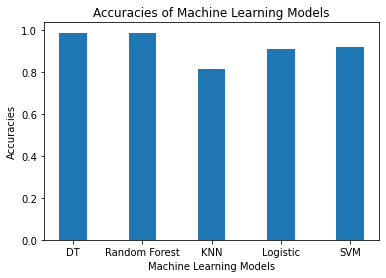

In [188]:
xlabels=['DT','Random Forest','KNN','Logistic','SVM']
ylabels=[decision_tree_model.score(x_train,y_train),random_forest_model.score(x_train,y_train),knn_classifier_model.score(x_train,y_train),logistic_regression_model.score(x_train,y_train),svm_classifier_model.score(x_train,y_train)]
# Simple Bar Plot
plt.bar(xlabels,ylabels,width=0.4)
plt.xlabel('Machine Learning Models')
plt.ylabel("Accuracies")
plt.title('Accuracies of Machine Learning Models')
plt.show()

### Decision Tree Gives Better Accuracy than Random Forest Algorithm, KNN Algorithm, Logistic Regresssion and SVM Classifier.

## Model with best Accuracy : Decision Tree Classifier Model